In [39]:
import numpy as np

In [45]:
mischka_hallmarks = {}
mischka_hallmarks["poly-A"] = []
mischka_hallmarks["TSD"] = []
mischka_hallmarks["both"] = []
mischka_hallmarks['neither'] = []
f = open("/nfs/turbo/jmkidddata/matt-projects/Stuff_For_Anthony/Identify_Hallmarks_From_Retrogenes/Retrogene_Output_dist_60.txt", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    chro, start, end, gene = line[0], line[1], line[2], line[4]
    retro = (chro, start, end, gene)
    
    # is there a poly-A?
    poly_A_presence = False
    if line[5] != "N/A":
        poly_A_presence = True
        poly_A_tail = line[6]
    
    # is there a TSD
    TSD_presence = False
    if line[7] != "N/A":
        TSD_presence = True
        TSD = line[8]
    
    if poly_A_presence is False and TSD_presence is False:
        retro = (chro, start, end, gene)
        mischka_hallmarks['neither'].append(retro)
    elif poly_A_presence is True and TSD_presence is False:
        retro = (chro, start, end, gene, poly_A_tail)
        mischka_hallmarks['poly-A'].append(retro)
    elif poly_A_presence is False and TSD_presence is True:
        retro = (chro, start, end, gene, TSD)
        mischka_hallmarks['TSD'].append(retro)
    else:
        retro = (chro, start, end, gene, poly_A_tail, TSD)
        mischka_hallmarks['both'].append(retro)
f.close()

total_rcs = 0
for category, rcs in mischka_hallmarks.items():
    total_rcs += len(rcs)
for category, rcs in mischka_hallmarks.items():
    print(category, len(rcs), len(rcs) / total_rcs * 100)

poly-A 14 0.5092761004001455
TSD 1816 66.06038559476173
both 903 32.84830847580938
neither 16 0.5820298290287377


In [61]:
903+14+1816+16

2749

In [42]:
(903+14+1816)/(903+14+1816+16)

0.9941797017097126

In [36]:
mischka_hallmarks

{'poly-A': [('chr11', '44034279', '44035305', 'TPT1', 'AAAAGAATAAAAA'),
  ('chr12', '4258405', '4259907', 'FKBP1A', 'TTTTTTTTTTTTTTTTTTTTTTTTTT'),
  ('chr14', '12098944', '12101618', 'ZNF300', 'AAAAAAAAAAAA'),
  ('chr18', '21557305', '21557760', 'HNRNPD', 'AAAAAAA'),
  ('chr20', '50955685', '50956220', 'RPL10', 'AAAAAAAA'),
  ('chr21', '6609165', '6609622', 'CHCHD10', 'AAAAAAAAAA'),
  ('chr3', '14078651', '14080357', 'FKBP1A', 'TTTTTTTTTTTTTTTTTT'),
  ('chr3', '32232661', '32234724', 'EMID1', 'AAAAAAAAAA'),
  ('chr32', '14811420', '14814758', 'SEPTIN2', 'TTTATTTATTTTTTTTGTTGTTTTTT'),
  ('chr4', '37945311', '37945775', 'RPL9', 'TTTTTTTTTTTTTTTTTTTTT'),
  ('chr5',
   '75918910',
   '75919349',
   'RPL7A',
   'TTTATTTATTTTTTATCTTTATTTTTTATTTTTTTT'),
  ('chr7', '48832768', '48833024', 'RPL32_2', 'TTTTTTTTTTTTTTT'),
  ('chr8', '14141052', '14142670', 'LOC119863874', 'TTTTTTTTTTTT'),
  ('chr9', '60262793', '60264154', 'HNRNPA1', 'AAAAAAAAAAAA')],
 'TSD': [('chr1', '6681570', '6682924', 'NPM1

In [ ]:
# mean vs. median lengths of the hallmarks

In [38]:
polyA_lengths = []
tsd_lengths = []
for retro in mischka_hallmarks['poly-A']:
    polyA_lengths.append(len(retro[4]))
for retro in mischka_hallmarks['TSD']:
    polyA_lengths.append(len(retro[4]))
for retro in mischka_hallmarks['both']:
    polyA_lengths.append(len(retro[4]))
    tsd_lengths.append(len(retro[5]))

In [40]:
np.mean(polyA_lengths), np.median(polyA_lengths)

(11.22136845956824, 9.0)

In [41]:
np.mean(tsd_lengths), np.median(tsd_lengths)

(11.850498338870432, 12.0)

In [ ]:
# fullORF subset

In [55]:
fullORF = []
f = open("mischka.fullORF_retrocopies.sorted.txt", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    fullORF.append((line[0], line[1], line[2]))
f.close()
fullORF

[('chr10', '45624520', '45626831'),
 ('chr11', '12175193', '12175911'),
 ('chr11', '42427399', '42429635'),
 ('chr12', '11811453', '11812310'),
 ('chr12', '33514730', '33515690'),
 ('chr12', '39236778', '39237126'),
 ('chr13', '7975752', '7977501'),
 ('chr13', '49216889', '49218432'),
 ('chr15', '7550734', '7552827'),
 ('chr15', '46788485', '46789360'),
 ('chr16', '2316333', '2321340'),
 ('chr16', '13985502', '13985850'),
 ('chr20', '5410643', '5411154'),
 ('chr20', '49967488', '49968518'),
 ('chr21', '43534227', '43537015'),
 ('chr23', '16592854', '16593753'),
 ('chr24', '16359570', '16360079'),
 ('chr24', '24640180', '24640730'),
 ('chr24', '32101390', '32102484'),
 ('chr24', '35284590', '35285098'),
 ('chr25', '2363245', '2365443'),
 ('chr25', '30999014', '30999680'),
 ('chr26', '27119115', '27120447'),
 ('chr26', '29882765', '29884239'),
 ('chr27', '182162', '183273'),
 ('chr27', '4614281', '4615673'),
 ('chr27', '9276759', '9278912'),
 ('chr3', '14934690', '14935390'),
 ('chr3', '

In [57]:
316/437

0.7231121281464531

In [56]:
fullORF_hallmarks = {}
fullORF_hallmarks["poly-A"] = []
fullORF_hallmarks["TSD"] = []
fullORF_hallmarks["both"] = []
fullORF_hallmarks['neither'] = []
f = open("/nfs/turbo/jmkidddata/matt-projects/Stuff_For_Anthony/Identify_Hallmarks_From_Retrogenes/Retrogene_Output_dist_60.txt", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    chro, start, end, gene = line[0], line[1], line[2], line[4]
    compare = (chro, start, end)
    if compare not in fullORF:
        continue
    
    # is there a poly-A?
    poly_A_presence = False
    if line[5] != "N/A":
        poly_A_presence = True
        poly_A_tail = line[6]
    
    # is there a TSD
    TSD_presence = False
    if line[7] != "N/A":
        TSD_presence = True
        TSD = line[8]
    
    if poly_A_presence is False and TSD_presence is False:
        retro = (chro, start, end, gene)
        fullORF_hallmarks['neither'].append(retro)
    elif poly_A_presence is True and TSD_presence is False:
        retro = (chro, start, end, gene, poly_A_tail)
        fullORF_hallmarks['poly-A'].append(retro)
    elif poly_A_presence is False and TSD_presence is True:
        retro = (chro, start, end, gene, TSD)
        fullORF_hallmarks['TSD'].append(retro)
    else:
        retro = (chro, start, end, gene, poly_A_tail, TSD)
        fullORF_hallmarks['both'].append(retro)
f.close()

total_rcs = 0
for category, rcs in fullORF_hallmarks.items():
    total_rcs += len(rcs)
for category, rcs in fullORF_hallmarks.items():
    print(category, len(rcs), len(rcs) / total_rcs * 100)

poly-A 0 0.0
TSD 25 53.191489361702125
both 22 46.808510638297875
neither 0 0.0


In [ ]:
# check other dogs

In [4]:
dogs = ['mischka', 'mCanLor1.2', "nala", "sandy", "tasha", "wags", "yella"]

In [7]:
dog_hallmarks = {}
for dog in dogs:
    dog_hallmarks[dog] = {}
    dog_hallmarks[dog]["both"] = []
    dog_hallmarks[dog]["TSD"] = []
    dog_hallmarks[dog]["poly-A"] = []
    dog_hallmarks[dog]['neither'] = []
    f = open("/nfs/turbo/jmkidddata/matt-projects/Stuff_For_Anthony/Identify_Hallmarks_From_Retrogenes/Scale_Up/{}/Retrogene_Output_dist_60.txt".format(dog), 'rt')
    inFile = f.readlines()
    for line in inFile:
        line = line.rstrip().split()
        chro, start, end, gene = line[0], line[1], line[2], line[4]
        retro = (chro, start, end, gene)

        # is there a poly-A?
        poly_A_presence = False
        if line[5] != "N/A":
            poly_A_presence = True
            poly_A_tail = line[6]

        # is there a TSD
        TSD_presence = False
        if line[7] != "N/A":
            TSD_presence = True
            TSD = line[8]

        if poly_A_presence is False and TSD_presence is False:
            retro = (chro, start, end, gene)
            dog_hallmarks[dog]['neither'].append(retro)
        elif poly_A_presence is True and TSD_presence is False:
            retro = (chro, start, end, gene, poly_A_tail)
            dog_hallmarks[dog]['poly-A'].append(retro)
        elif poly_A_presence is False and TSD_presence is True:
            retro = (chro, start, end, gene, TSD)
            dog_hallmarks[dog]['TSD'].append(retro)
        else:
            retro = (chro, start, end, gene, poly_A_tail, TSD)
            dog_hallmarks[dog]['both'].append(retro)
    f.close()
    
    print(dog)
    total_rcs = 0
    for category, rcs in dog_hallmarks[dog].items():
        total_rcs += len(rcs)
    for category, rcs in dog_hallmarks[dog].items():
        print(category, len(rcs), round(len(rcs) / total_rcs * 100, 2), total_rcs)
    print()

mischka
both 903 32.85 2749
TSD 1816 66.06 2749
poly-A 14 0.51 2749
neither 16 0.58 2749

mCanLor1.2
both 877 32.48 2700
TSD 1791 66.33 2700
poly-A 14 0.52 2700
neither 18 0.67 2700

nala
both 865 31.75 2724
TSD 1817 66.7 2724
poly-A 14 0.51 2724
neither 28 1.03 2724

sandy
both 862 31.99 2695
TSD 1799 66.75 2695
poly-A 18 0.67 2695
neither 16 0.59 2695

tasha
both 856 32.89 2603
TSD 1713 65.81 2603
poly-A 11 0.42 2603
neither 23 0.88 2603

wags
both 795 32.77 2426
TSD 1594 65.7 2426
poly-A 16 0.66 2426
neither 21 0.87 2426

yella
both 796 30.24 2632
TSD 1792 68.09 2632
poly-A 17 0.65 2632
neither 27 1.03 2632



In [ ]:
# fullORF, all assemblies

In [9]:
fullORF = {}
for dog in dogs:
    fullORF[dog] = []
    f = open("{}.fullORF_retrocopies.txt".format(dog), 'rt')
    inFile = f.readlines()
    for line in inFile:
        line = line.rstrip().split()
        fullORF[dog].append((line[0], line[1], line[2]))
    f.close()
fullORF

{'mischka': [('chr9', '29216208', '29217463'),
  ('chr9', '15499567', '15500552'),
  ('chrX', '41046799', '41048111'),
  ('chr23', '16592854', '16593753'),
  ('chr7', '38845029', '38846100'),
  ('chr3', '59667993', '59669896'),
  ('chr11', '42427399', '42429635'),
  ('chr6', '5736879', '5737226'),
  ('chr12', '39236778', '39237126'),
  ('chr16', '13985502', '13985850'),
  ('chr24', '16359570', '16360079'),
  ('chr20', '5410643', '5411154'),
  ('chr32', '6937676', '6939231'),
  ('chr12', '33514730', '33515690'),
  ('chr16', '2316333', '2321340'),
  ('chr27', '9276759', '9278912'),
  ('chr13', '49216889', '49218432'),
  ('chr5', '1841510', '1842910'),
  ('chr15', '46788485', '46789360'),
  ('chr7', '59839803', '59840627'),
  ('chr27', '4614281', '4615673'),
  ('chr26', '29882765', '29884239'),
  ('chr10', '45624520', '45626831'),
  ('chr8', '8222136', '8223548'),
  ('chr9', '13714609', '13715186'),
  ('chr11', '12175193', '12175911'),
  ('chr3', '72881536', '72882955'),
  ('chr15', '7550

In [12]:
fullORF_hallmarks = {}
for dog in dogs:
    fullORF_hallmarks[dog] = {}
    f = open("/nfs/turbo/jmkidddata/matt-projects/Stuff_For_Anthony/Identify_Hallmarks_From_Retrogenes/Scale_Up/{}/Retrogene_Output_dist_60.txt".format(dog), 'rt')
    inFile = f.readlines()
    fullORF_hallmarks[dog]["both"] = []
    fullORF_hallmarks[dog]["TSD"] = []
    fullORF_hallmarks[dog]["poly-A"] = []
    fullORF_hallmarks[dog]['neither'] = []
    for line in inFile:
        line = line.rstrip().split()
        chro, start, end, gene = line[0], line[1], line[2], line[4]
        compare = (chro, start, end)
        if compare not in fullORF[dog]:
            continue

        # is there a poly-A?
        poly_A_presence = False
        if line[5] != "N/A":
            poly_A_presence = True
            poly_A_tail = line[6]

        # is there a TSD
        TSD_presence = False
        if line[7] != "N/A":
            TSD_presence = True
            TSD = line[8]

        if poly_A_presence is False and TSD_presence is False:
            retro = (chro, start, end, gene)
            fullORF_hallmarks[dog]['neither'].append(retro)
        elif poly_A_presence is True and TSD_presence is False:
            retro = (chro, start, end, gene, poly_A_tail)
            fullORF_hallmarks[dog]['poly-A'].append(retro)
        elif poly_A_presence is False and TSD_presence is True:
            retro = (chro, start, end, gene, TSD)
            fullORF_hallmarks[dog]['TSD'].append(retro)
        else:
            retro = (chro, start, end, gene, poly_A_tail, TSD)
            fullORF_hallmarks[dog]['both'].append(retro)
    f.close()

    print(dog)
    total_rcs = 0
    for category, rcs in fullORF_hallmarks[dog].items():
        total_rcs += len(rcs)
    print(total_rcs)
    for category, rcs in fullORF_hallmarks[dog].items():
        print(category, len(rcs), round(len(rcs) / total_rcs * 100, 2))
    print()

mischka
47
both 22 46.81
TSD 25 53.19
poly-A 0 0.0
neither 0 0.0

mCanLor1.2
39
both 20 51.28
TSD 19 48.72
poly-A 0 0.0
neither 0 0.0

nala
35
both 12 34.29
TSD 23 65.71
poly-A 0 0.0
neither 0 0.0

sandy
35
both 13 37.14
TSD 21 60.0
poly-A 1 2.86
neither 0 0.0

tasha
31
both 10 32.26
TSD 21 67.74
poly-A 0 0.0
neither 0 0.0

wags
32
both 12 37.5
TSD 20 62.5
poly-A 0 0.0
neither 0 0.0

yella
32
both 11 34.38
TSD 21 65.62
poly-A 0 0.0
neither 0 0.0



In [3]:
# chr length vs rc presence

In [4]:
import matplotlib.pyplot as plt

In [5]:
chrom_size = {}
f = open("UU_Cfam_GSD_1.0_ROSY.chrom.sizes", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    chro = line[0]
    if "chrY" in chro or "chrUn" in chro or "chrM" in chro:
        continue
    chrom_size[line[0]] = int(line[1])
f.close()
chrom_size

{'chr1': 123556469,
 'chr2': 84979418,
 'chr3': 92479059,
 'chr4': 89535178,
 'chr5': 89562946,
 'chr6': 78113029,
 'chr7': 81081596,
 'chr8': 76405709,
 'chr9': 61171909,
 'chr10': 70643054,
 'chr11': 74805798,
 'chr12': 72970719,
 'chr13': 64299765,
 'chr14': 61112200,
 'chr15': 64676183,
 'chr16': 60362399,
 'chr17': 65088165,
 'chr18': 56472973,
 'chr19': 55516201,
 'chr20': 58627490,
 'chr21': 51742555,
 'chr22': 61573679,
 'chr23': 53134997,
 'chr24': 48566227,
 'chr25': 51730745,
 'chr26': 39257614,
 'chr27': 46662488,
 'chr28': 41733330,
 'chr29': 42517134,
 'chr30': 40643782,
 'chr31': 39901454,
 'chr32': 40225481,
 'chr33': 32139216,
 'chr34': 42397973,
 'chr35': 28051305,
 'chr36': 31223415,
 'chr37': 30785915,
 'chr38': 24803098,
 'chrX': 124992030}

In [6]:
mischka_retros_by_chro = {}
f = open("mischka.blat_retrocopies.sorted.txt", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    chro = line[0]
    if chro not in mischka_retros_by_chro.keys():
        mischka_retros_by_chro[chro] = []
    mischka_retros_by_chro[chro].append(tuple(line))
f.close()
mischka_retros_by_chro

{'chr1': [('chr1', '325442', '330783', '+', 'ZFR'),
  ('chr1', '5321742', '5324308', '+', 'MAPRE1'),
  ('chr1', '6681570', '6682924', '+', 'NPM1'),
  ('chr1', '6892120', '6892855', '+', 'TEX35'),
  ('chr1', '7316393', '7317488', '-', 'GAPDH'),
  ('chr1', '9335740', '9337412', '+', 'HNRNPC'),
  ('chr1', '10073973', '10074431', '+', 'NME1'),
  ('chr1', '12966880', '12967310', '+', 'RPL31'),
  ('chr1', '14211119', '14211771', '+', 'BTF3'),
  ('chr1', '14743646', '14744381', '+', 'PPIA'),
  ('chr1', '14868550', '14869191', '+', 'RPL29'),
  ('chr1', '16250497', '16251091', '+', 'RPL17'),
  ('chr1', '16393476', '16394886', '+', 'ST13'),
  ('chr1', '21241007', '21241633', '-', 'TMSB4X'),
  ('chr1', '22415592', '22416645', '+', 'GAPDH'),
  ('chr1', '25306158', '25307408', '+', 'TUBA1C'),
  ('chr1', '25423520', '25424378', '-', 'OSTC'),
  ('chr1', '25530599', '25532151', '+', 'DNAJA2'),
  ('chr1', '25792449', '25793104', '-', 'RAB2A'),
  ('chr1', '25813048', '25813537', '+', 'EFCAB11'),
  ('chr

In [18]:
total = 0
for chro, retros in mischka_retros_by_chro.items():
    total += len(retros)
total

2749

In [7]:
mischka_retros_by_chro.keys()

dict_keys(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21', 'chr22', 'chr23', 'chr24', 'chr25', 'chr26', 'chr27', 'chr28', 'chr29', 'chr3', 'chr30', 'chr31', 'chr32', 'chr33', 'chr34', 'chr35', 'chr36', 'chr37', 'chr38', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chrX'])

In [8]:
mischka_retro_count = []
mischka_chrom_length = []
for chro, rcs in mischka_retros_by_chro.items():
    mischka_retro_count.append(len(rcs))
    mischka_chrom_length.append(chrom_size[chro])

In [9]:
mischka_retro_count

[129,
 83,
 93,
 75,
 75,
 75,
 62,
 91,
 72,
 53,
 64,
 80,
 60,
 66,
 69,
 69,
 37,
 76,
 44,
 59,
 36,
 50,
 107,
 49,
 36,
 84,
 30,
 36,
 33,
 32,
 29,
 29,
 92,
 77,
 79,
 95,
 116,
 79,
 228]

In [10]:
mischka_chrom_length

[123556469,
 70643054,
 74805798,
 72970719,
 64299765,
 61112200,
 64676183,
 60362399,
 65088165,
 56472973,
 55516201,
 84979418,
 58627490,
 51742555,
 61573679,
 53134997,
 48566227,
 51730745,
 39257614,
 46662488,
 41733330,
 42517134,
 92479059,
 40643782,
 39901454,
 40225481,
 32139216,
 42397973,
 28051305,
 31223415,
 30785915,
 24803098,
 89535178,
 89562946,
 78113029,
 81081596,
 76405709,
 61171909,
 124992030]

Text(0.5, 1.0, 'Retrocopy Count vs. Chromosome Size in Mischka')

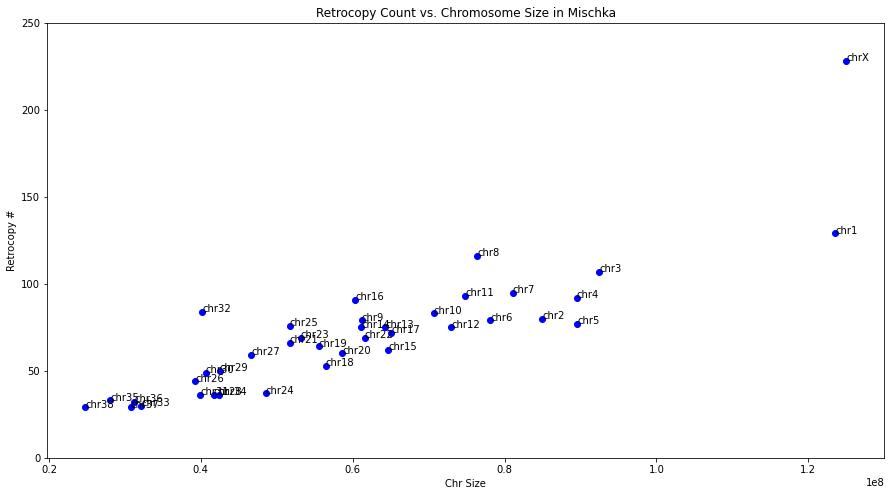

In [33]:
plt.figure(figsize=(15,8))
for i in range(len(mischka_chrom_length)):
    plt.plot(mischka_chrom_length[i], mischka_retro_count[i],'bo')
    plt.text(mischka_chrom_length[i] + 0.01, mischka_retro_count[i] + 0.01, list(mischka_retros_by_chro.keys())[i])
plt.xlabel('Chr Size')
plt.ylabel('Retrocopy #')
plt.ylim(0,250)
plt.title("Retrocopy Count vs. Chromosome Size in Mischka")

In [51]:
permutations_set = {chro:0 for chro in mischka_retros_by_chro.keys()}
chrX_set = []
for i in range(1000):
    f = open("permutations/mischka.retrocopy_permute.{}:.txt".format(str(i + 1)), 'rt')
    inFile = f.readlines()
    chrX_count = 0
    for line in inFile:
        line = line.rstrip().split()
        chro = line[0]
        permutations_set[chro] += 1
        if chro == "chrX":
            chrX_count += 1
    f.close()
    chrX_set.append(chrX_count)
permutations_avg = []
for chro, count in permutations_set.copy().items():
    permutations_avg.append(count/1000)
permutations_avg

[143.654,
 82.61,
 87.3,
 85.104,
 74.744,
 71.493,
 75.692,
 70.356,
 75.838,
 65.922,
 64.77,
 99.146,
 69.034,
 60.483,
 71.66,
 62.169,
 56.652,
 60.332,
 45.642,
 54.535,
 48.843,
 49.936,
 108.136,
 47.692,
 46.594,
 46.713,
 37.595,
 49.432,
 32.602,
 36.269,
 35.927,
 29.015,
 104.432,
 104.94,
 91.431,
 94.919,
 89.382,
 71.976,
 146.03]

In [59]:
permutations_avg[7], mischka_retro_count[7]

(70.356, 91)

In [60]:
permutations_avg[31], mischka_retro_count[31]

(29.015, 29)

In [53]:
chrX_set

[140,
 172,
 136,
 138,
 140,
 153,
 144,
 142,
 135,
 153,
 136,
 164,
 137,
 126,
 139,
 148,
 144,
 146,
 145,
 143,
 162,
 135,
 145,
 156,
 142,
 155,
 133,
 126,
 148,
 143,
 130,
 162,
 147,
 140,
 152,
 130,
 159,
 134,
 127,
 152,
 137,
 137,
 138,
 146,
 145,
 152,
 145,
 152,
 143,
 156,
 154,
 161,
 152,
 151,
 130,
 137,
 155,
 146,
 153,
 148,
 146,
 145,
 141,
 144,
 145,
 160,
 144,
 141,
 150,
 142,
 129,
 158,
 161,
 146,
 136,
 151,
 140,
 131,
 134,
 154,
 128,
 125,
 161,
 157,
 124,
 152,
 147,
 162,
 141,
 165,
 144,
 152,
 153,
 152,
 147,
 138,
 140,
 120,
 139,
 154,
 131,
 136,
 147,
 141,
 168,
 160,
 152,
 144,
 148,
 157,
 127,
 144,
 158,
 150,
 133,
 168,
 137,
 164,
 124,
 141,
 140,
 153,
 140,
 162,
 135,
 158,
 159,
 177,
 128,
 135,
 131,
 154,
 141,
 133,
 137,
 149,
 143,
 161,
 154,
 156,
 142,
 152,
 161,
 145,
 122,
 145,
 130,
 144,
 138,
 150,
 169,
 127,
 146,
 164,
 153,
 126,
 158,
 125,
 155,
 144,
 146,
 137,
 140,
 135,
 156,
 145,
 120

In [52]:
max(chrX_set)

188

In [28]:
sum(permutations_avg)

2749.000000000001

Text(0.5, 1.0, 'Retrocopy Count vs. Chromosome Size in 1000 Permutations')

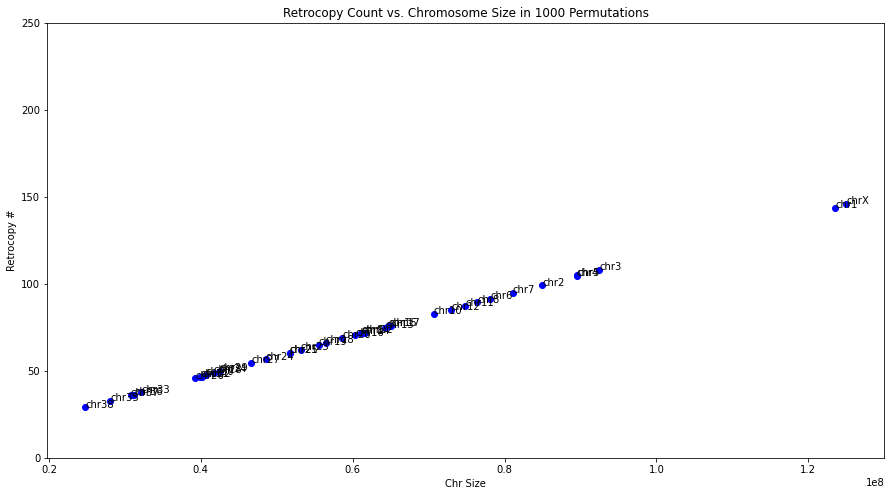

In [34]:
plt.figure(figsize=(15,8))
for i in range(len(mischka_chrom_length)):
    plt.plot(mischka_chrom_length[i], permutations_avg[i],'bo')
    plt.text(mischka_chrom_length[i] + 0.01, permutations_avg[i] + 0.01, list(mischka_retros_by_chro.keys())[i])
plt.xlabel('Chr Size')
plt.ylabel('Retrocopy #')
plt.ylim(0,250)
plt.title("Retrocopy Count vs. Chromosome Size in 1000 Permutations")